# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


Matplotlib is building the font cache; this may take a moment.


In [3]:
df = pd.read_csv(r"C:\Users\shams\Downloads\Country-data (1).csv")

In [4]:
df.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
df.shape

(167, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [8]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

# **Data distribution**

In [9]:
df.set_index('country',inplace = True)

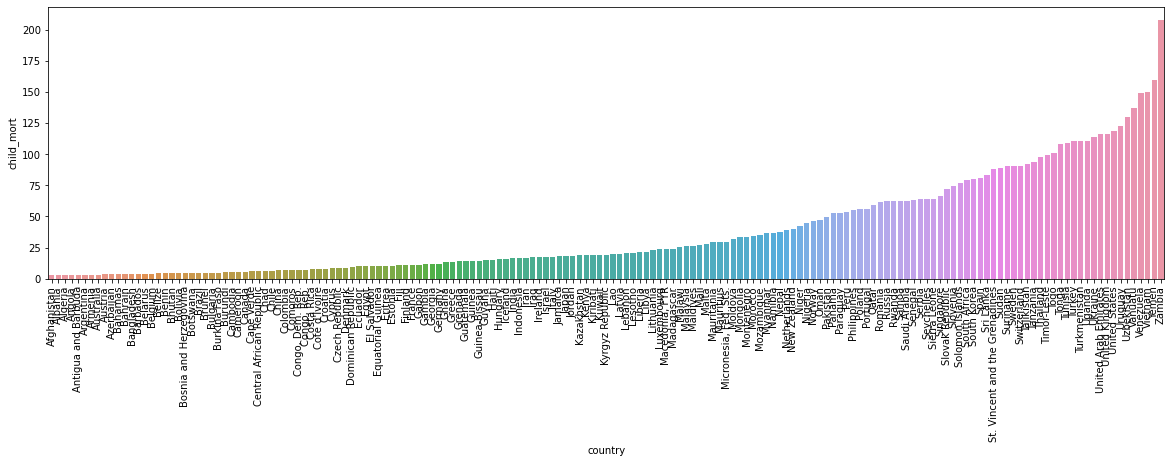

In [10]:
plt.figure(figsize=(20,5))
sns.barplot(x=df.index,y=df['child_mort'].sort_values(),data=df)
plt.xticks(rotation=90)
plt.show()

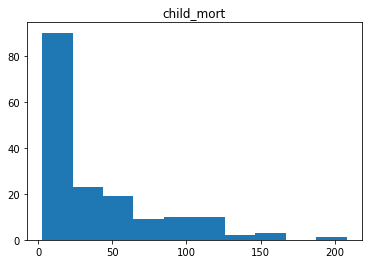

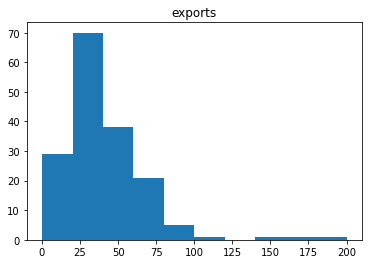

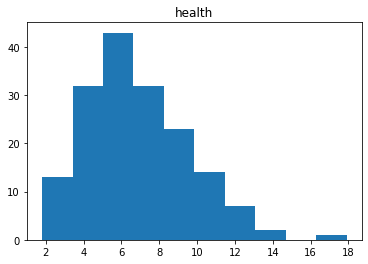

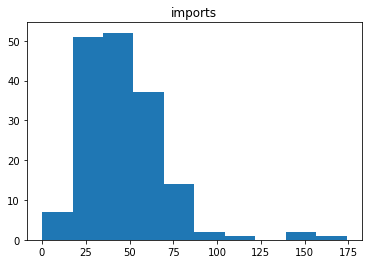

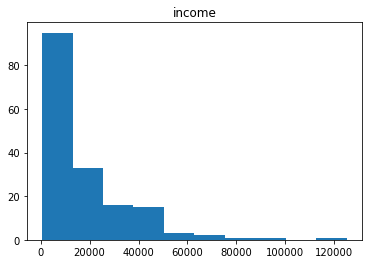

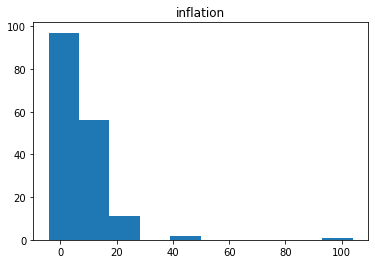

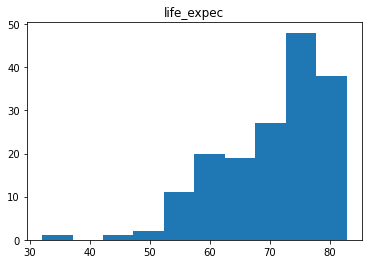

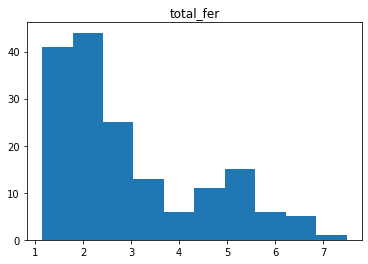

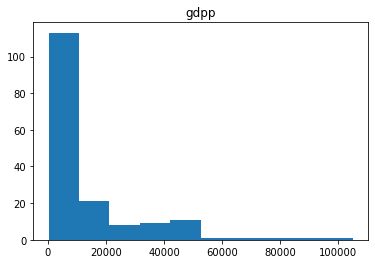

In [11]:
columns = df.columns


for c in columns:
    fig, ax = plt.subplots()
    ax.hist(df[c])
    ax.set_title(c)
plt.show() 

   
    
   


# Data evaluation and reduction

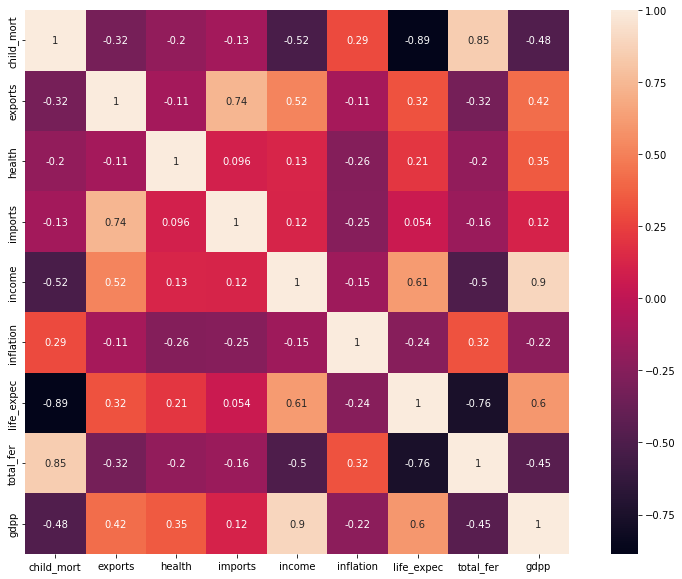

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),square=True,annot=True)
plt.show()

life_expect, high correlation with child mortality

total_fertility, high correlation with child mortality

income, high correlation with gdpp

# Scale the data: MinMaxScaler (normalised)


In [13]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(data_scaled,columns = df.columns)
print(df_scaled.head())

   child_mort   exports    health   imports    income  inflation  life_expec  \
0    0.426485  0.049482  0.358608  0.257765  0.008047   0.126144    0.475345   
1    0.068160  0.139531  0.294593  0.279037  0.074933   0.080399    0.871795   
2    0.120253  0.191559  0.146675  0.180149  0.098809   0.187691    0.875740   
3    0.566699  0.311125  0.064636  0.246266  0.042535   0.245911    0.552268   
4    0.037488  0.227079  0.262275  0.338255  0.148652   0.052213    0.881657   

   total_fer      gdpp  
0   0.736593  0.003073  
1   0.078864  0.036833  
2   0.274448  0.040365  
3   0.790221  0.031488  
4   0.154574  0.114242  


# PCA: Principal Component Analysis

In [14]:
model = PCA()
model.fit(data_scaled)
transformed = model.transform(data_scaled)
print(model.n_components_)
print(transformed.shape)
print(model.explained_variance_ratio_)

9
(167, 9)
[0.55001227 0.13384784 0.12301053 0.09749047 0.03777964 0.03013659
 0.01190434 0.00887791 0.00694042]


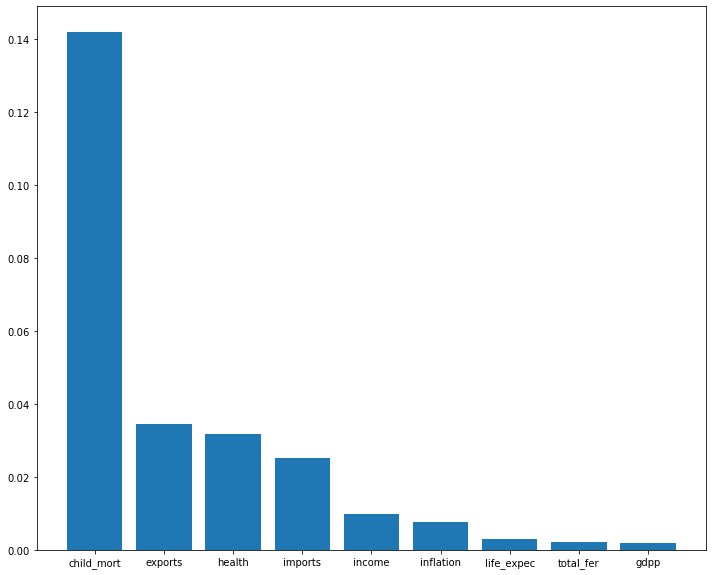

In [15]:
features = range(model.n_components_)
plt.figure(figsize =(12,10))
plt.bar(features,model.explained_variance_)
plt.xticks(features,df.columns)
plt.show()

** we can see that there are 4 principal components can explain about 90% of the distribution of the original data.**

In [16]:
model = PCA(n_components = 4)
model.fit(data_scaled)
pca_features = model.transform(data_scaled)
print(model.n_components_)
print(pca_features.shape)
print


4
(167, 4)


<function print>

# Model: K-Means Clustering

C:\Users\shams\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


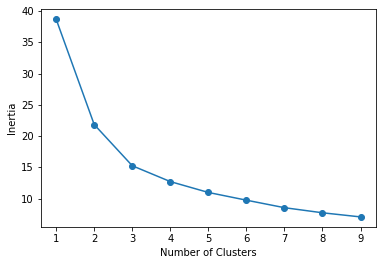

In [17]:
ks = range(1,10)
inertias = []
for k in ks:
    kn = KMeans(n_clusters=k)
    kn.fit(pca_features)
    inertias.append(kn.inertia_)
    
plt.plot(ks,inertias,marker='o')
plt.xticks(ks)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

C:\Users\shams\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


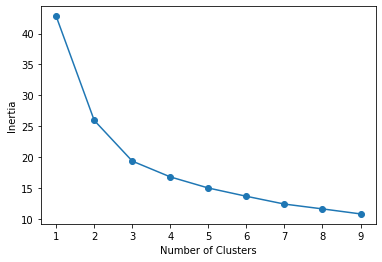

In [18]:
ks = range(1,10)
inertias = []
for k in ks:
    kn = KMeans(n_clusters=k)
    kn.fit(data_scaled)
    inertias.append(kn.inertia_)
    
plt.plot(ks,inertias,marker='o')
plt.xticks(ks)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

**After running the K-Means model with the a normalised dataset and a PCA with 4 components (with standardised scaling) we can see that the optimal number of clusters is still 3 with different levels of inertia. Two clusters could also be considered as per results of dataset after PCA.**

# Cluster analysis

In [19]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(pca_features)
labels = kmeans.predict(pca_features)

In [20]:
df['cluster'] = labels

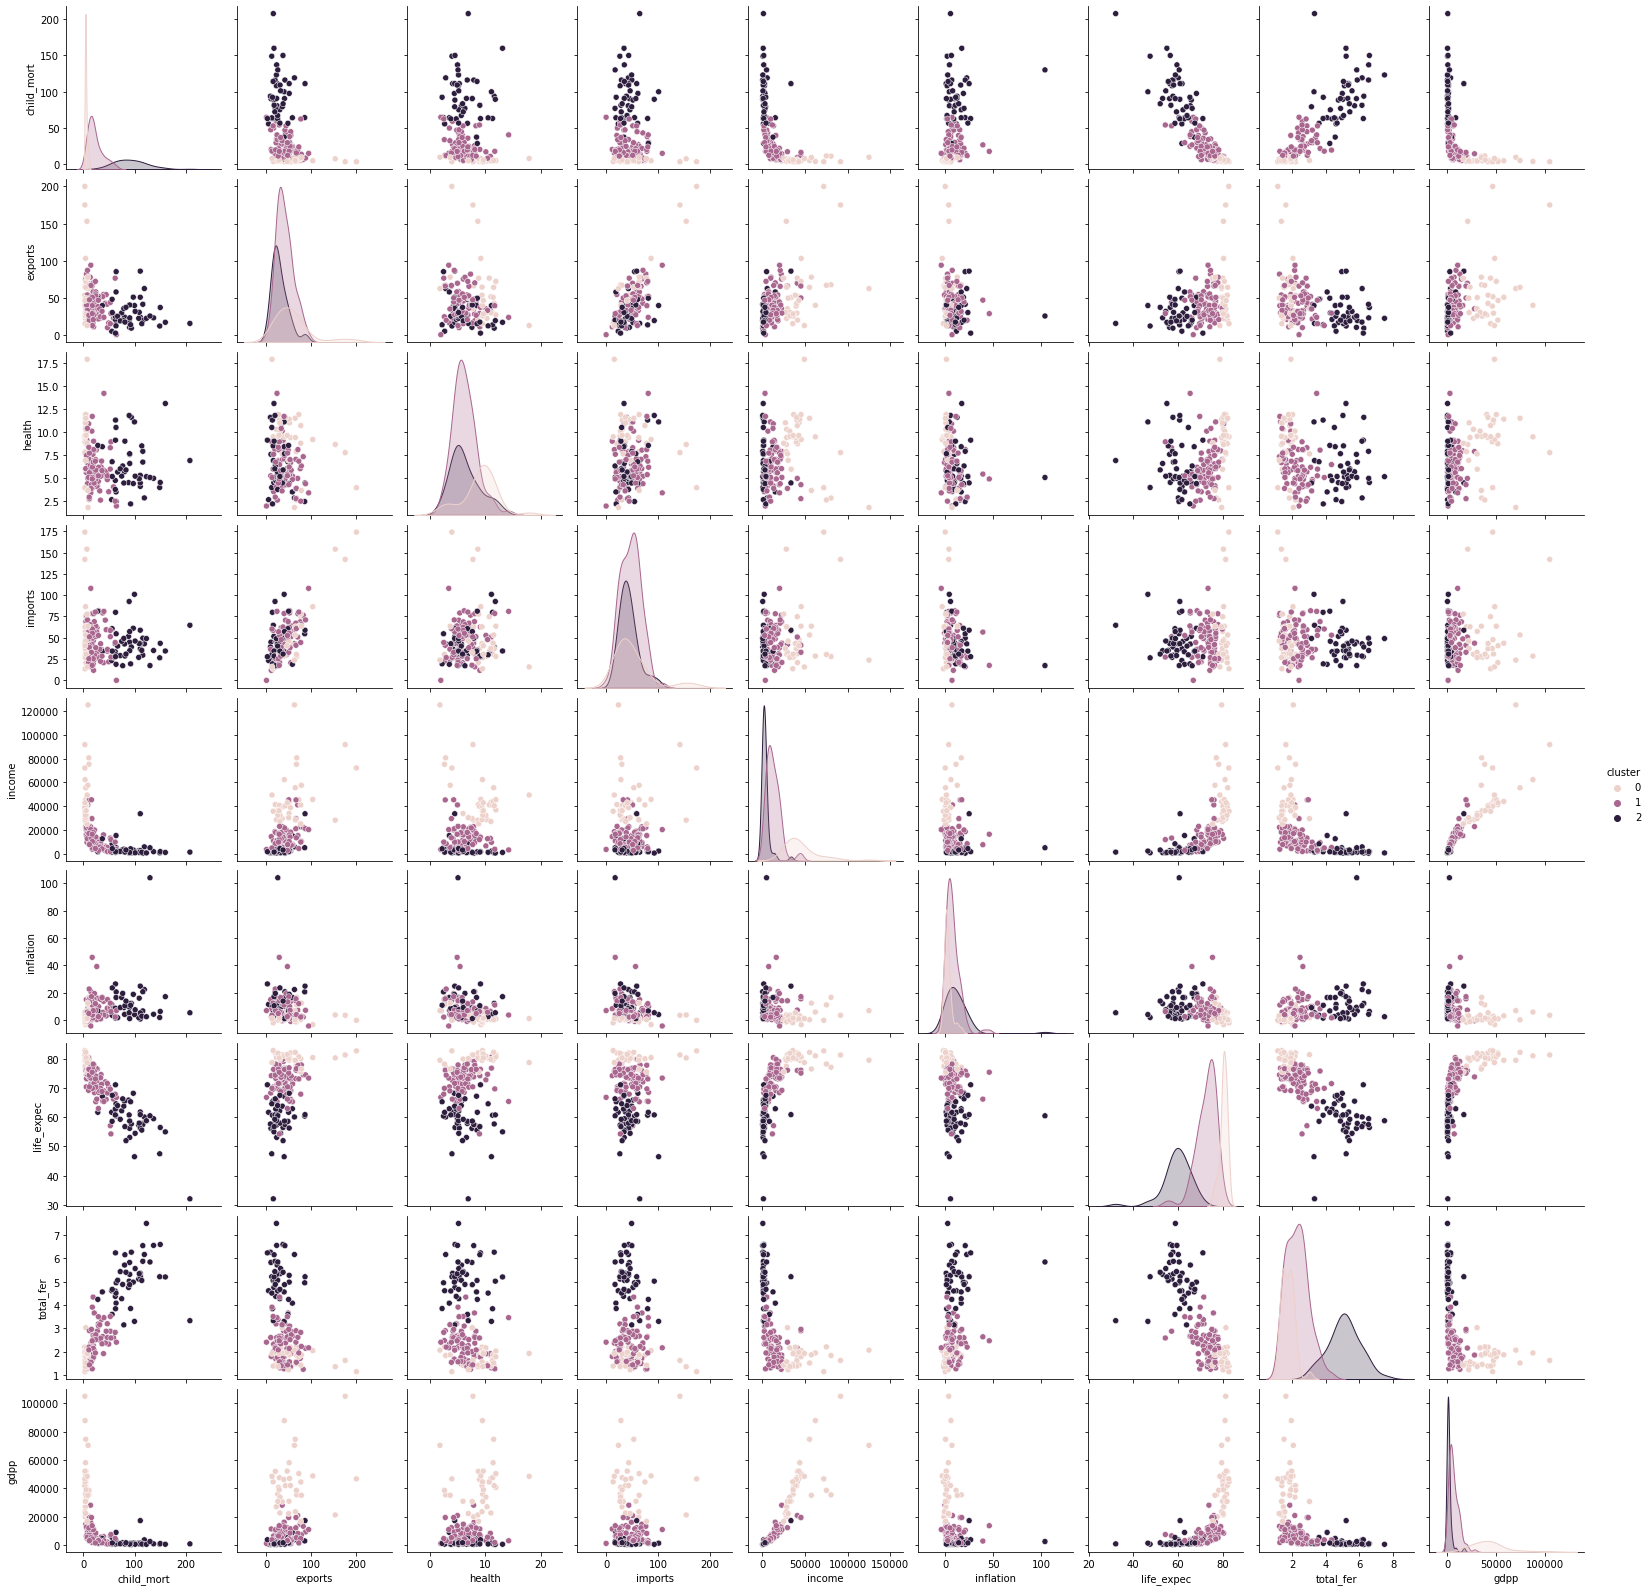

In [21]:
sns.pairplot(df,hue='cluster',data=df)
plt.show()

# Cluster Table

In [22]:
clusters_table = pd.pivot_table(df,index=df.cluster)
clusters_table

,child_mort,exports,gdpp,health,imports,income,inflation,life_expec,total_fer
cluster,,,,,,,,,
0,4.897143,58.431429,43117.142857,8.917429,51.508571,45802.857143,2.535000,80.245714,1.741143
1,22.425581,40.382430,6719.790698,6.215581,46.932162,12770.813953,7.609023,72.582558,2.293256
2,93.284783,29.287174,1695.913043,6.338478,43.297826,3516.804348,12.097065,59.393478,5.090217


In [23]:
print(df[df.cluster == 2].index)

Index(['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon',
       'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Cote d'Ivoire', 'Equatorial Guinea', 'Eritrea', 'Gabon',
       'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya',
       'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Pakistan',
       'Rwanda', 'Senegal', 'Sierra Leone', 'Solomon Islands', 'Sudan',
       'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia'],
      dtype='object', name='country')


**Cluster 2: This cluster is characterised by having the most negative values: high child mortality, lowest economic development, low gdpp, exports and imports, lowest life expectancy**

In [24]:
print(df[df.cluster == 1].index)
print(df.cluster.value_counts())

Index(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Bulgaria', 'Cambodia', 'Cape Verde', 'Chile', 'China',
       'Colombia', 'Costa Rica', 'Croatia', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Georgia', 'Grenada',
       'Guatemala', 'Guyana', 'Hungary', 'India', 'Indonesia', 'Iran',
       'Jamaica', 'Jordan', 'Kazakhstan', 'Kyrgyz Republic', 'Latvia',
       'Lebanon', 'Libya', 'Lithuania', 'Macedonia, FYR', 'Malaysia',
       'Maldives', 'Mauritius', 'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia',
       'Montenegro', 'Morocco', 'Myanmar', 'Nepal', 'Oman', 'Panama',
       'Paraguay', 'Peru', 'Philippines', 'Poland', 'Romania', 'Russia',
       'Samoa', 'Saudi Arabia', 'Serbia', 'Seychelles', 'South Africa',
       'Sri Lanka', 'St. Vincent and th

**Cluster 1: This cluster is characterised by showing really strong or positive values such as good economic development, high life expectancy, low child mortality**

In [25]:
print(df[df.cluster == 0].index)

Index(['Australia', 'Austria', 'Belgium', 'Brunei', 'Canada', 'Cyprus',
       'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany', 'Greece',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait',
       'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway',
       'Portugal', 'Qatar', 'Singapore', 'Slovak Republic', 'Slovenia',
       'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates',
       'United Kingdom', 'United States'],
      dtype='object', name='country')


**Cluster 0: This cluster is characterised by showing average values for all features when comparing with other clusters**

# Conclusion

Based on an initial assessment of the average values of each cluster, Cluster 2 could be focus for further analysis. However, when we plot the clusters and look at the graphs, we see that there is overlapping of clusters as well as spread out clusters.

Utilising PCA as an alternative did not result in a significant difference.

We've been able to identify some patters in the data and group countries into 3 clusters. However, we should not rely solely on this result to make the recommendation of countries that should receive funding. There are a few alternatives to explore before we can make this recommendation.

The clustering can be considered as a preprocessing step and further analysis is required.

# Hierarchical Clustering

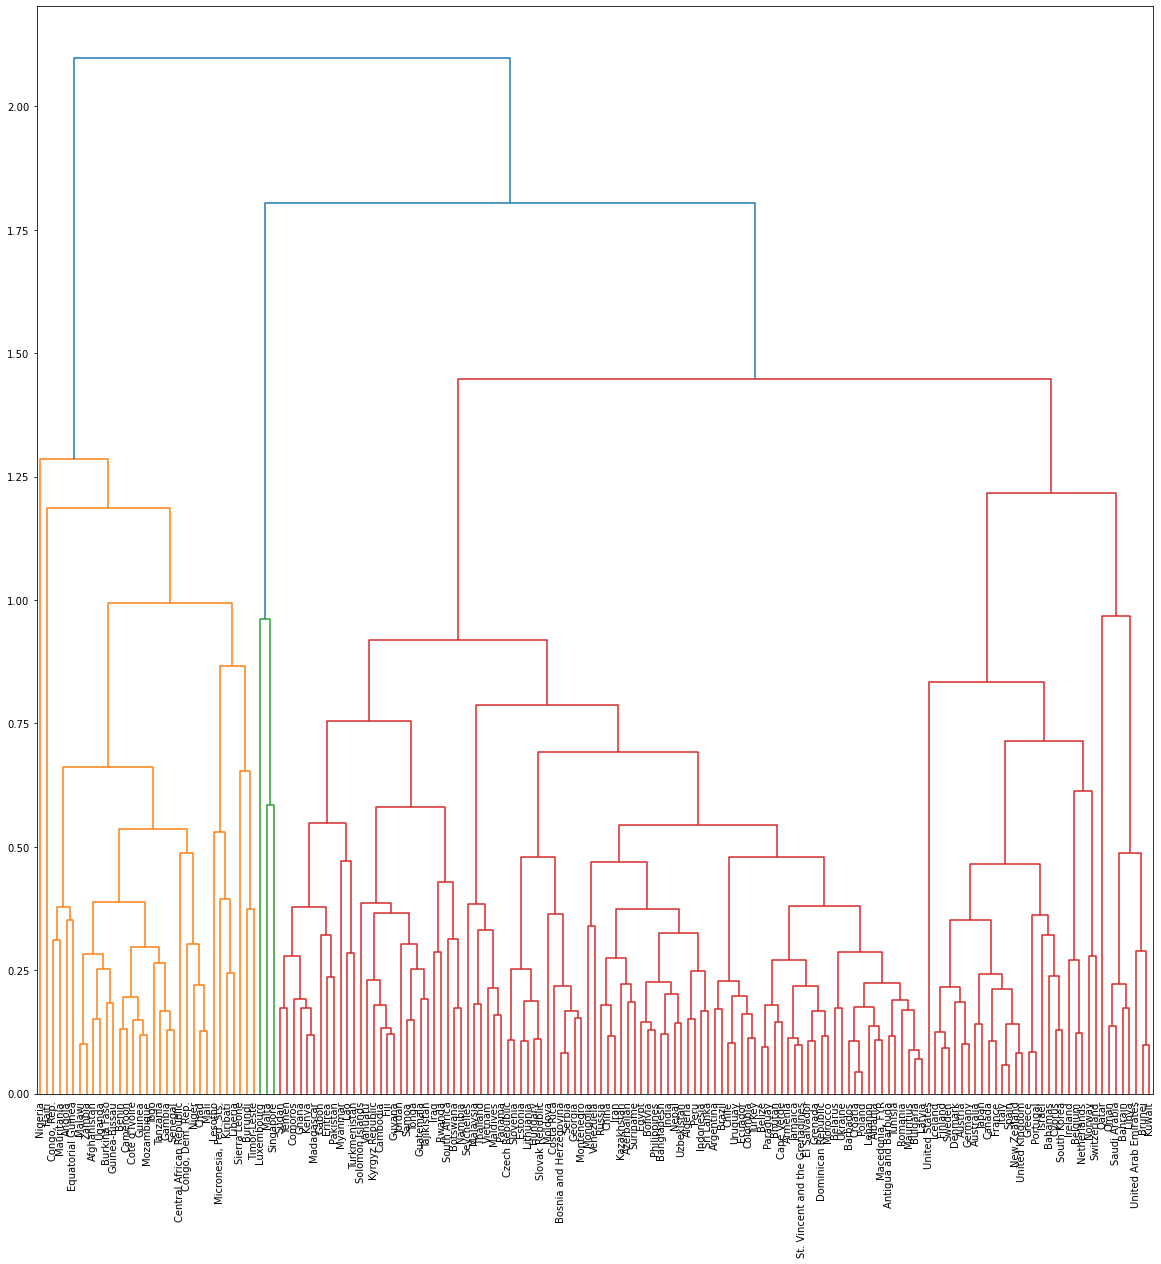

In [26]:
plt.figure(figsize=(20,20))
mergings = linkage(data_scaled,method='complete')
dendrogram(mergings,labels=df.index,leaf_rotation=90,leaf_font_size=10)
plt.show()

In [27]:
labels = fcluster(mergings,1.35,criterion='distance')

df['cluster_hier'] = labels
print(labels)
print(len(labels))

[1 3 3 1 3 3 3 4 4 3 4 4 3 3 3 4 3 1 3 3 3 3 3 4 3 1 1 3 1 4 3 1 1 3 3 3 3
 1 1 3 1 3 4 3 4 3 3 3 3 1 3 3 3 4 4 3 1 3 4 3 4 3 3 1 1 3 1 3 4 3 3 3 3 4
 4 4 3 4 3 3 3 1 4 3 3 3 3 1 1 4 3 2 3 3 1 3 3 1 2 1 3 1 3 3 3 3 1 3 3 3 4
 4 1 1 4 4 3 3 3 3 3 3 4 4 3 3 3 3 4 1 3 3 1 2 3 3 3 3 4 4 3 3 3 3 4 4 3 1
 3 1 1 3 3 3 3 1 3 4 4 4 3 3 3 3 3 3 1]
167


In [28]:
print(df[df['cluster_hier']==1].index)


Index(['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon',
       'Central African Republic', 'Chad', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Cote d'Ivoire', 'Equatorial Guinea', 'Gambia', 'Guinea',
       'Guinea-Bissau', 'Haiti', 'Kiribati', 'Lesotho', 'Liberia', 'Malawi',
       'Mali', 'Mauritania', 'Micronesia, Fed. Sts.', 'Mozambique', 'Niger',
       'Nigeria', 'Senegal', 'Sierra Leone', 'Tanzania', 'Timor-Leste', 'Togo',
       'Uganda', 'Zambia'],
      dtype='object', name='country')
